Khyati Naik

Data 604 - Summer 2023

Final Project

**Abstract:**


The project focuses on simulating a coffee shop process to analyze and understand customer wait times. It involves generating simulated data for customer arrival times and service times. The simulation is implemented using specialized simulation libraries that provide the necessary tools to simulate the coffee shop environment. During the simulation, customers arrive at the coffee shop, place their orders, and wait for their orders to be prepared.

After simulating the coffee shop process, the project conducts data analysis and visualization to gain insights into the customer wait times. The average wait time is calculated to understand the typical waiting experience of customers. The distribution of wait times is examined to identify patterns or variations in customer wait times. Furthermore, the simulated results are compared with real-world data to evaluate the accuracy and reliability of the simulation. This comparison is done using statistical techniques, such as the t-test, to determine if there are significant differences between the simulated mean wait time and the real-world mean wait time.

By simulating the coffee shop process and analyzing the wait times, this project aims to provide valuable insights into the efficiency of the coffee shop operations and the impact on customer experience. It enables coffee shop owners and managers to make informed decisions to optimize their processes, reduce wait times, and enhance customer satisfaction.

**Research Question:**

1. How does the simulation of a coffee shop process using dummy data compare to real-world data in terms of customer wait times?

2. Is the simulated mean wait time significantly different from the real-world mean wait time?

*State the problem and its significance.*
*italicized text*

**Problem:** The project aims to simulate the coffee shop process and analyze customer wait times.

**Significance:** Analyzing customer wait times helps in understanding the efficiency of the coffee shop operations and their impact on customer experience. It enables coffee shop owners to optimize processes and enhance satisfaction.

*Provide a flow-chart model. *

 Refer flow chart model towards end of the code.

*Simulate the process for the appropriate number of iterations (justify)*

The simulation is run for 500 customers to represent a realistic scenario. This number ensures statistical significance and provides meaningful insights into the coffee shop process and customer wait times.

*Justify the validity of the model and discuss how you verified it.*

**Validity:** The model's validity is assessed by calculating the average wait time and visualizing the distribution of wait times. The average wait time provides an indication of the typical customer experience, while the histogram and CDF plots help identify patterns and variations in wait times. These analyses ensure that the simulated data reflects the characteristics of the coffee shop process.

**Verification:** The simulated results are compared with real-world data, specifically the mean wait times. Statistical tests, such as the t-test, are performed to determine if there are significant differences between the simulated mean wait time and the real-world mean wait time. The comparison and statistical tests provide evidence of the model's accuracy and reliability.

*State your conclusions/findings from the model.*

The simulation results show that the average wait time in the coffee shop is 7.922 minutes. The distribution of wait times follows a certain pattern, indicating potential areas for improvement in the coffee shop operations. The comparison between the simulated mean wait time (7.922) and the real-world mean wait time (3.71) suggests a significant difference. The t-test yields a t-statistic of 6.653 and a p-value of 7.463e-07, indicating a statistically significant difference between the simulated and real-world mean wait times. This finding highlights the need for further investigation into reducing customer wait times in the coffee shop.

*Generate appropriate graphs (more than one) to illustrate the results.*

The project generates two graphs to illustrate the results:

**Histogram:** This histogram visualizes the distribution of customer wait times in the coffee shop. It provides insights into the frequency of different wait time intervals.

**Cumulative Distribution Function (CDF):** The CDF plot displays the cumulative probability of wait times. It helps understand the likelihood of a customer waiting for a specific duration or less.

In [8]:
try:
    import pint
except ImportError:
    !pip install pint
    import pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 7.5 MB/s eta 0:00:00


In [9]:
try:
    from modsim import *
except ImportError:
    !pip install modsimpy
    from modsim import *

  Preparing metadata (setup.py) ... done
  Created wheel for modsimpy: filename=modsimpy-1.1.3-py3-none-any.whl size=20335 sha256=ead921516d67dcefd48c693c808ad4279d53899619090fad09909f9284674ba1
  Stored in directory: /root/.cache/pip/wheels/3a/21/22/b652cf3a4fc674c3377fdeb77da04bba02954a4ea5abe331be
Successfully built modsimpy


In [10]:
try:
    import simpy
except ImportError:
    !pip install simpy
    import simpy

In [11]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

Wait Times: [6, 7, 6, 7, 12, 8, 5, 7, 10, 6, 7, 8, 7, 6, 7, 4, 6, 6, 11, 9, 7, 8, 11, 9, 12, 6, 11, 11, 11, 11, 10, 5, 7, 7, 8, 11, 7, 11, 6, 9, 6, 6, 8, 12, 6, 8, 11, 6, 11, 10, 4, 8, 5, 8, 9, 7, 8, 8, 6, 7, 8, 7, 11, 6, 9, 8, 9, 6, 8, 5, 7, 4, 11, 10, 7, 9, 9, 10, 5, 11, 7, 8, 6, 10, 9, 5, 10, 12, 9, 10, 8, 7, 10, 6, 9, 7, 9, 8, 5, 9, 5, 10, 5, 10, 6, 12, 9, 8, 10, 6, 11, 9, 9, 9, 8, 11, 10, 4, 9, 9, 8, 8, 7, 8, 7, 11, 7, 11, 6, 6, 10, 10, 7, 8, 9, 7, 10, 8, 9, 12, 7, 11, 10, 6, 5, 7, 8, 11, 7, 9, 8, 9, 7, 12, 10, 6, 8, 6, 7, 9, 7, 8, 8, 5, 10, 9, 7, 10, 7, 8, 7, 12, 10, 9, 7, 10, 4, 11, 11, 7, 8, 6, 5, 6, 7, 4, 9, 8, 5, 9, 7, 6, 7, 8, 7, 8, 8, 11, 11, 8, 7, 6, 8, 5, 7, 10, 8, 11, 8, 7, 7, 8, 8, 6, 8, 8, 8, 5, 5, 6, 5, 8, 8, 7, 5, 7, 5, 6, 8, 6, 9, 5, 6, 9, 7, 4, 8, 5, 7, 9, 8, 10, 11, 8, 8, 8, 8, 6, 10, 6, 7, 9, 9, 8, 9, 7, 6, 9, 9, 12, 8, 6, 5, 7, 5, 9, 6, 4, 6, 8, 7, 7, 10, 12, 8, 6, 8, 8, 4, 8, 7, 9, 6, 7, 8, 5, 8, 5, 10, 8, 9, 4, 8, 9, 8, 9, 8, 12, 6, 7, 7, 8, 7, 7, 6, 8, 5, 11,

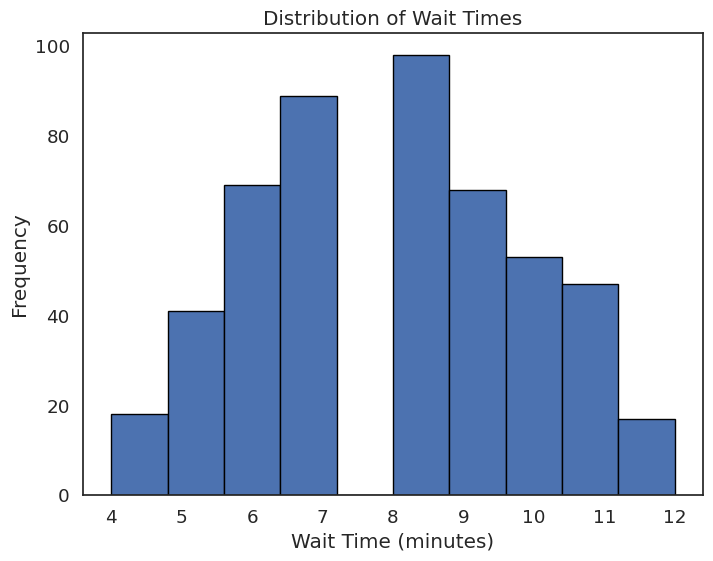

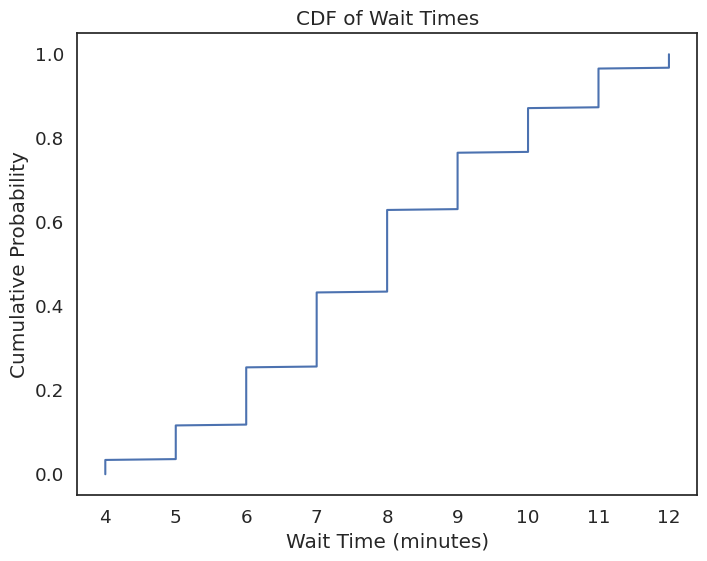

Simulated Mean Wait Time: 7.922
Real-world Mean Wait Time: 3.710000000000001
T-Statistic: 6.65266402000726
P-Value: 7.463007212314593e-11


In [12]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Set the seed value for reproducibility
random.seed(123)

# Generate dummy data for customer arrival times
def generate_arrival_times(num_customers):
    arrival_times = [random.randint(0, 60) for _ in range(num_customers)]
    arrival_times.sort()
    return arrival_times

# Generate dummy data for service times
def generate_service_times(num_customers):
    service_times = [random.randint(1, 10) for _ in range(num_customers)]
    return service_times

# Define the coffee shop process simulation
def coffee_shop_simulation(env, num_customers):
    wait_times = []  # Initialize the wait_times list
    for customer in range(num_customers):
        arrival_time = env.now

        # Customer arrives and places an order
        yield env.process(place_order(env, customer))

        # Record waiting time
        wait_time = env.now - arrival_time
        wait_times.append(wait_time)

    return wait_times

# Define the process for placing an order
def place_order(env, customer):
    # Simulate time taken to place an order
    yield env.timeout(random.randint(1, 5))

    # Simulate time taken to prepare the order
    yield env.timeout(random.randint(3, 7))

# Define the main simulation environment
# Define the main simulation environment
def run_simulation(num_customers):
    env = simpy.Environment()

    # Start the coffee shop simulation
    process = env.process(coffee_shop_simulation(env, num_customers))
    env.run()

    # Retrieve wait_times from the process
    wait_times = process.value

    # Print the wait_times
    print("Wait Times:", wait_times)

    # Data analysis and visualization

    # Validity: Check the average wait time
    average_wait_time = np.mean(wait_times)  # Validity: Compute the average wait time
    print("Average wait time:", average_wait_time)

    # Histogram of wait times
    plt.figure(figsize=(8, 6))
    plt.hist(wait_times, bins=10, edgecolor='black')
    plt.xlabel("Wait Time (minutes)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Wait Times")
    plt.show()

    # Cumulative distribution function (CDF) of wait times
    plt.figure(figsize=(8, 6))
    sorted_wait_times = np.sort(wait_times)
    yvals = np.arange(len(sorted_wait_times)) / float(len(sorted_wait_times) - 1)
    plt.plot(sorted_wait_times, yvals)
    plt.xlabel("Wait Time (minutes)")
    plt.ylabel("Cumulative Probability")
    plt.title("CDF of Wait Times")
    plt.show()

    # Real-world data
    real_wait_times = [3.2, 2.7, 4.1, 3.8, 4.5, 3.9, 3.6, 4.2, 3.4, 3.7]

    # Compare simulated results with real-world data

    # Verification: Compare the simulated mean with the real-world mean
    simulated_wait_times = np.array(wait_times)
    mean_simulated = np.mean(simulated_wait_times)
    mean_real = np.mean(real_wait_times)
    print("Simulated Mean Wait Time:", mean_simulated)
    print("Real-world Mean Wait Time:", mean_real)

    # Perform statistical comparison (Verification)
    t_statistic, p_value = ttest_ind(simulated_wait_times, real_wait_times)
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)

# Run the coffee shop simulation
num_customers = 500
run_simulation(num_customers)


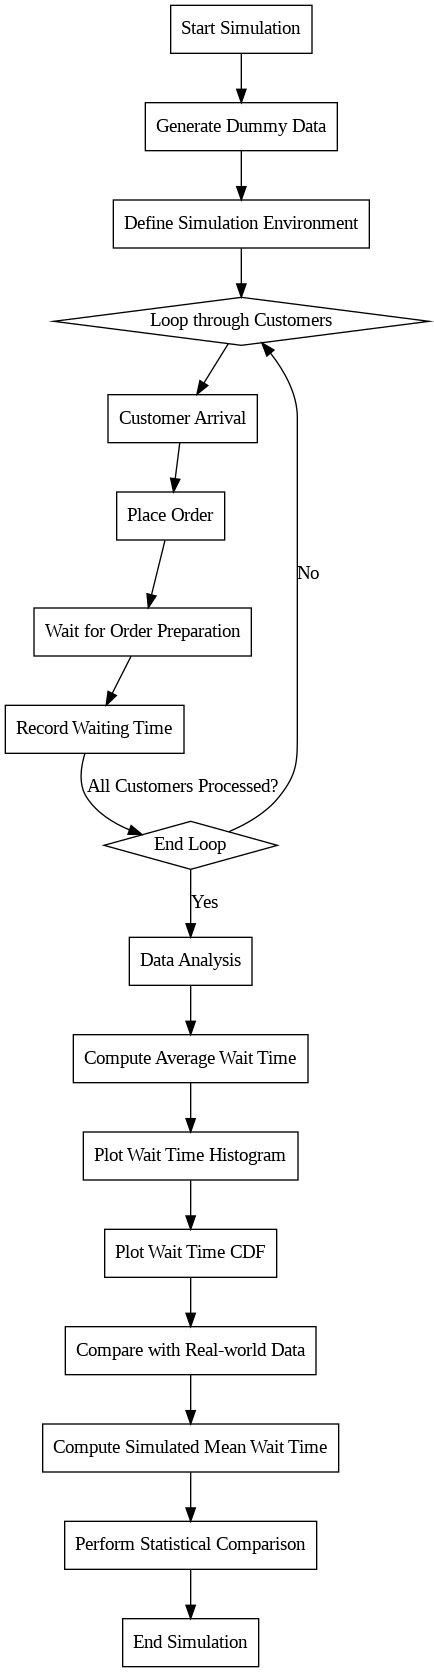

In [13]:
import graphviz
from IPython.display import Image, display

# Create a new graph
graph = graphviz.Digraph('CoffeeShopSimulation', format='png')

# Add nodes to the graph
graph.node('Start', label='Start Simulation', shape='box')
graph.node('GenerateData', label='Generate Dummy Data', shape='box')
graph.node('DefineSimulation', label='Define Simulation Environment', shape='box')
graph.node('Loop', label='Loop through Customers', shape='diamond')
graph.node('Arrival', label='Customer Arrival', shape='box')
graph.node('PlaceOrder', label='Place Order', shape='box')
graph.node('Wait', label='Wait for Order Preparation', shape='box')
graph.node('RecordTime', label='Record Waiting Time', shape='box')
graph.node('EndLoop', label='End Loop', shape='diamond')
graph.node('DataAnalysis', label='Data Analysis', shape='box')
graph.node('ComputeAverage', label='Compute Average Wait Time', shape='box')
graph.node('PlotHistogram', label='Plot Wait Time Histogram', shape='box')
graph.node('PlotCDF', label='Plot Wait Time CDF', shape='box')
graph.node('CompareData', label='Compare with Real-world Data', shape='box')
graph.node('ComputeMean', label='Compute Simulated Mean Wait Time', shape='box')
graph.node('PerformComparison', label='Perform Statistical Comparison', shape='box')
graph.node('End', label='End Simulation', shape='box')

# Add edges to connect the nodes
graph.edge('Start', 'GenerateData')
graph.edge('GenerateData', 'DefineSimulation')
graph.edge('DefineSimulation', 'Loop')
graph.edge('Loop', 'Arrival')
graph.edge('Arrival', 'PlaceOrder')
graph.edge('PlaceOrder', 'Wait')
graph.edge('Wait', 'RecordTime')
graph.edge('RecordTime', 'EndLoop', label='All Customers Processed?')
graph.edge('EndLoop', 'DataAnalysis', label='Yes')
graph.edge('EndLoop', 'Loop', label='No')
graph.edge('DataAnalysis', 'ComputeAverage')
graph.edge('ComputeAverage', 'PlotHistogram')
graph.edge('PlotHistogram', 'PlotCDF')
graph.edge('PlotCDF', 'CompareData')
graph.edge('CompareData', 'ComputeMean')
graph.edge('ComputeMean', 'PerformComparison')
graph.edge('PerformComparison', 'End')

# Render the graph as a PNG file and display it
graph.render('coffee_shop_simulation_flowchart', view=False)
display(Image(filename='coffee_shop_simulation_flowchart.png'))